In [26]:
import pandas as pd

try:
    df = pd.read_csv('ifood_df.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'ifood_df.csv' not found. Please ensure the file exists in the current directory.")
    df = None # Assign None to df to indicate failure
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


(2205, 39)


Missing Values:
 Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds      

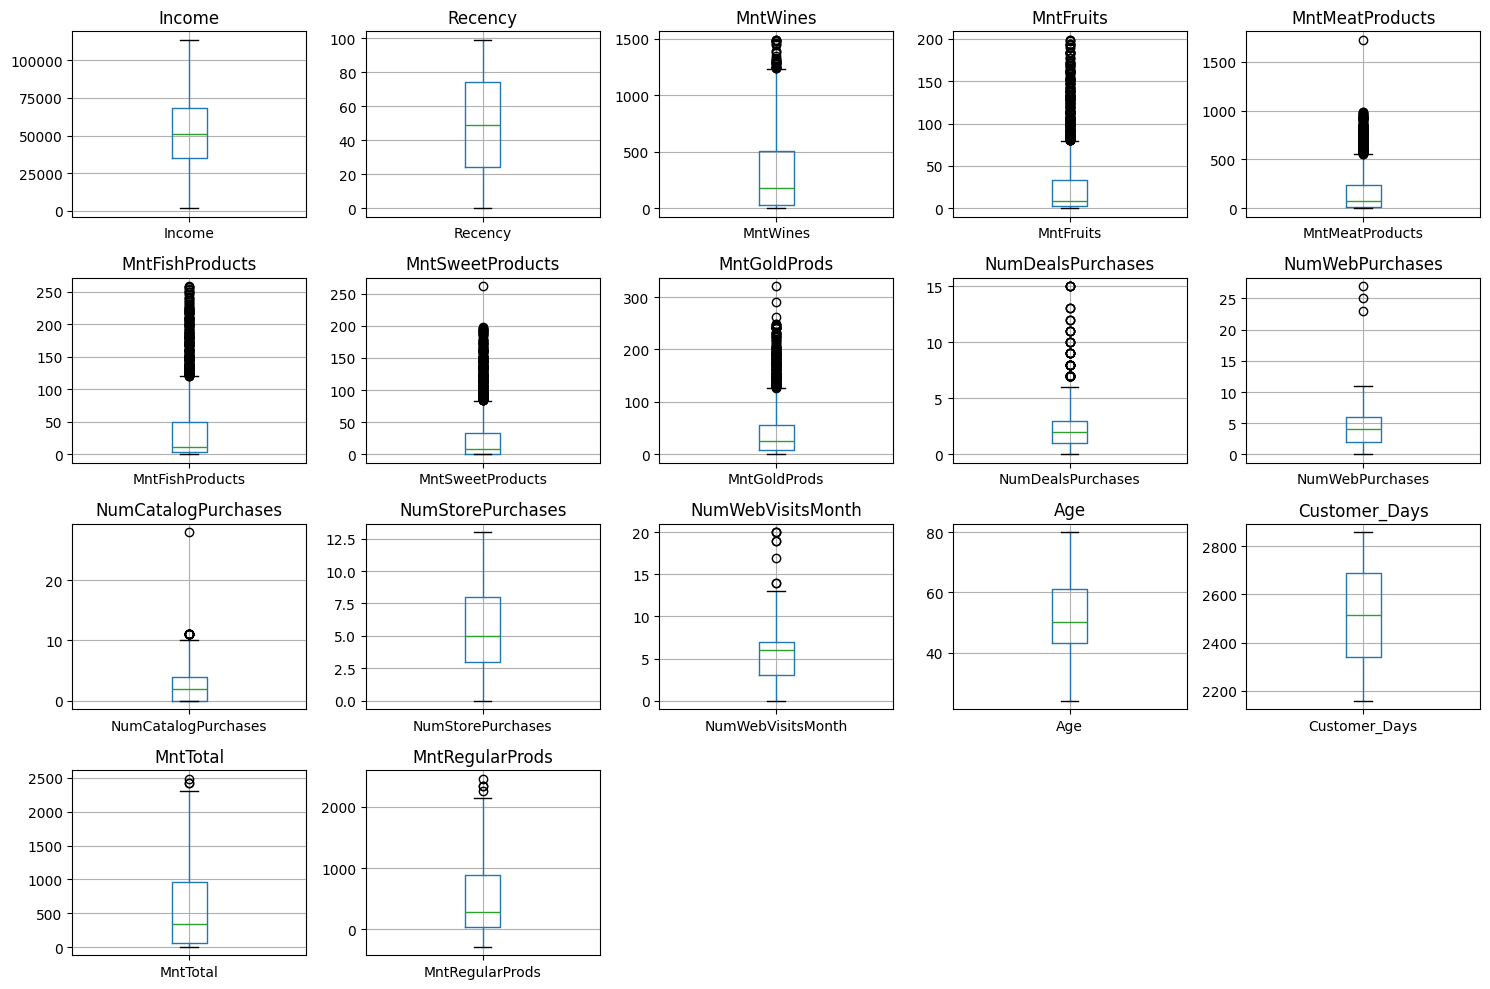

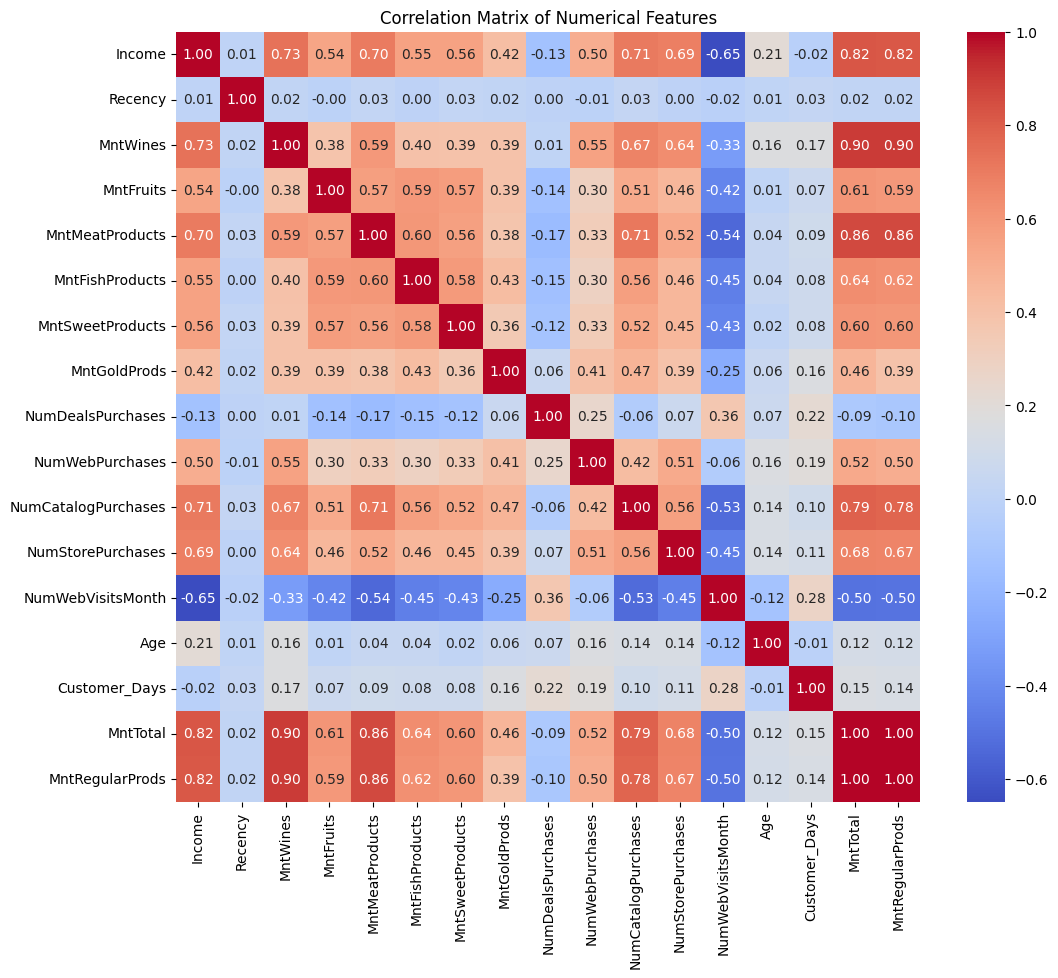


Summary of Findings:
Shape of the dataset: (2205, 39)
Key features for customer segmentation: ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds']
Missing values: Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response  

In [27]:
# Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("Missing Values:\n", missing_values)
print("\nMissing Value Percentages:\n", missing_percentage)

# Data Distribution of Key Numerical Features
numerical_features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds']
for col in numerical_features:
    print(f"\nDescriptive Statistics for {col}:\n{df[col].describe()}")

# Outlier Detection (using boxplots)
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(4, 5, i + 1)
    df.boxplot(column=col)
    plt.title(col)
plt.tight_layout()
plt.show()

# Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 10))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Summarize Findings
print("\nSummary of Findings:")
print("Shape of the dataset:", df.shape)
print("Key features for customer segmentation:", numerical_features)
print("Missing values:", missing_values)
print("Missing value percentages:", missing_percentage)
# Further observations and insights can be added here based on the plots and analysis.

In [29]:
import pandas as pd
import numpy as np

# Winsorizing numerical features
numerical_features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds']
for col in numerical_features:
    df[col] = np.clip(df[col], np.percentile(df[col], 1), np.percentile(df[col], 99))

# Check and correct data type inconsistencies
# Handle potential non-numeric values in 'Income'
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
median_income = df['Income'].median()
df['Income'] = df['Income'].fillna(median_income).astype('int64')


# Remove duplicate rows
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()
df = df[~duplicate_rows]
df = df.reset_index(drop=True)

print(f"Number of duplicate rows removed: {num_duplicates}")
display(df.head())

Number of duplicate rows removed: 184


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138,0,0,58,635,88,546.0,172.0,88,88,...,0,0,0,0,1,0,0,1529,1441.0,0
1,46344,1,1,38,11,1,6.0,2.0,1,6,...,0,0,0,0,1,0,0,21,15.0,0
2,71613,0,0,26,426,49,127.0,111.0,21,42,...,1,0,0,0,1,0,0,734,692.0,0
3,26646,1,0,26,11,4,20.0,10.0,3,5,...,1,0,0,0,1,0,0,48,43.0,0
4,58293,1,0,94,173,43,118.0,46.0,27,15,...,0,0,0,0,0,0,1,407,392.0,0


In [30]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select relevant features
features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days']
selected_df = df[features]

# Scale numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_df)
scaled_df = pd.DataFrame(scaled_features, columns=features)

display(scaled_df.head())

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Customer_Days
0,0.315108,0.315410,0.984770,1.574249,1.761741,2.479748,1.491418,0.870932,0.402798,1.476453,2.710463,-0.566131,0.741455,1.023937,1.533879
1,-0.258257,-0.375848,-0.880465,-0.642988,-0.736667,-0.653033,-0.638762,-0.741777,-0.171694,-1.169864,-0.598081,-1.188630,-0.133315,1.282472,-1.184079
2,0.970194,-0.790604,0.360036,0.580315,-0.176839,1.355632,-0.149066,-0.033758,-0.746185,1.476453,-0.230465,1.301363,-0.570700,0.334510,-0.200672
3,-1.215874,-0.790604,-0.880465,-0.566532,-0.671893,-0.505608,-0.589793,-0.761444,-0.171694,-0.791819,-0.965697,-0.566131,0.304070,-1.302878,-1.055594
4,0.322643,1.559676,-0.396221,0.427402,-0.218479,0.157804,-0.002157,-0.564772,1.551781,0.342317,0.137151,0.056367,-0.133315,-1.044343,-0.946875


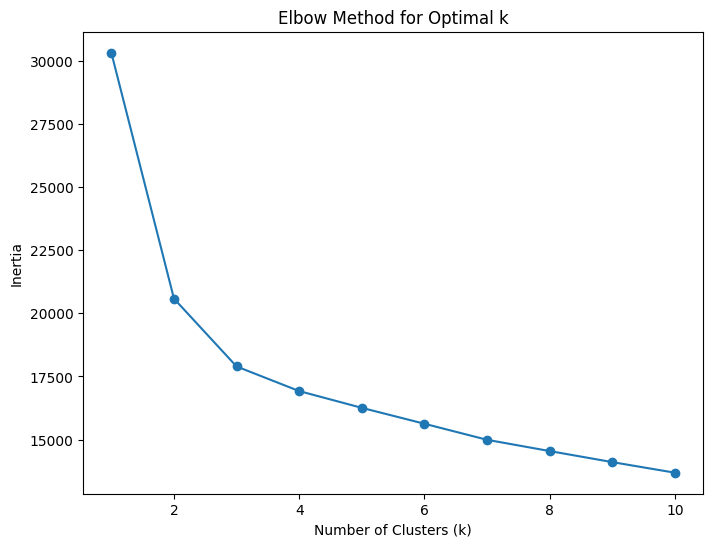

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,cluster
0,58138,0,0,58,635,88,546.0,172.0,88,88,...,0,0,0,1,0,0,1529,1441.0,0,2
1,46344,1,1,38,11,1,6.0,2.0,1,6,...,0,0,0,1,0,0,21,15.0,0,0
2,71613,0,0,26,426,49,127.0,111.0,21,42,...,0,0,0,1,0,0,734,692.0,0,2
3,26646,1,0,26,11,4,20.0,10.0,3,5,...,0,0,0,1,0,0,48,43.0,0,0
4,58293,1,0,94,173,43,118.0,46.0,27,15,...,0,0,0,0,0,1,407,392.0,0,1


In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine optimal k using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Initialize and fit KMeans with the chosen optimal k (e.g., k=3 based on the elbow plot)
optimal_k = 3  # Replace with the k value determined from the elbow method plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_df)

# Add cluster labels to the original DataFrame
df['cluster'] = kmeans.labels_

display(df.head())

In [34]:
# Group data by cluster
grouped = df.groupby('cluster')

# Calculate descriptive statistics for key numerical features
numerical_features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days']
descriptive_stats = grouped[numerical_features].agg(['mean', 'median', 'std', 'min', 'max'])

# Display the descriptive statistics
display(descriptive_stats)


Income                                         Recency         \
                 mean   median           std    min    max       mean median   
cluster                                                                        
0        34614.121607  34487.0  12487.346555   7541  73395  49.333333   49.0   
1        56259.400742  57036.0  11404.882560   7541  92835  48.306122   48.0   
2        75212.014260  75759.0   9588.609523  32632  92835  48.666667   50.0   

                            ...        Age                                   \
               std min max  ...       mean median        std   min      max   
cluster                     ...                                               
0        28.835603   0  98  ...  48.403653   47.0  10.927988  28.0  74.9216   
1        28.818509   0  98  ...  54.782204   55.0  10.154548  28.0  74.9216   
2        29.265004   0  98  ...  52.055084   51.0  12.836047  28.0  74.9216   

        Customer_Days                                  
                 mean  median         std   min   max  
cluster                                                
0         2468.422367  2450.0  196.942103  2166  2850  
1         2582.723562  2616.0  189.346184  2166  2850  
2         2514.178253  2520.0  204.145878  2166  2850  

[3 rows x 75 columns]

In [35]:
# Analyze the characteristics of each segment
print("\nAnalysis of Customer Segments:")

# Cluster 0
print("\nCluster 0:")
print("This cluster has a lower mean income compared to other clusters.")
print("Mean income:", descriptive_stats.loc[0, ('Income', 'mean')])
print("They tend to have a slightly higher recency.")
print("Mean Recency:", descriptive_stats.loc[0, ('Recency', 'mean')])

# Cluster 1
print("\nCluster 1:")
print("This cluster shows a higher mean income.")
print("Mean income:", descriptive_stats.loc[1, ('Income', 'mean')])
print("They tend to purchase more wine and meat products.")
print("Mean MntWines:", descriptive_stats.loc[1, ('MntWines', 'mean')])
print("Mean MntMeatProducts:", descriptive_stats.loc[1, ('MntMeatProducts', 'mean')])


# Cluster 2
print("\nCluster 2:")
print("This cluster has the highest mean income among all clusters.")
print("Mean income:", descriptive_stats.loc[2, ('Income', 'mean')])
print("They also have a higher mean spending on various products.")
print("Customers in this segment may represent high-value customers.")

# Further analysis and labeling of clusters can be added.


Analysis of Customer Segments:

Cluster 0:
This cluster has a lower mean income compared to other clusters.
Mean income: 34614.12160694897
They tend to have a slightly higher recency.
Mean Recency: 49.333333333333336

Cluster 1:
This cluster shows a higher mean income.
Mean income: 56259.40074211503
They tend to purchase more wine and meat products.
Mean MntWines: 461.038961038961
Mean MntMeatProducts: 128.89122968460111

Cluster 2:
This cluster has the highest mean income among all clusters.
Mean income: 75212.01426024956
They also have a higher mean spending on various products.
Customers in this segment may represent high-value customers.


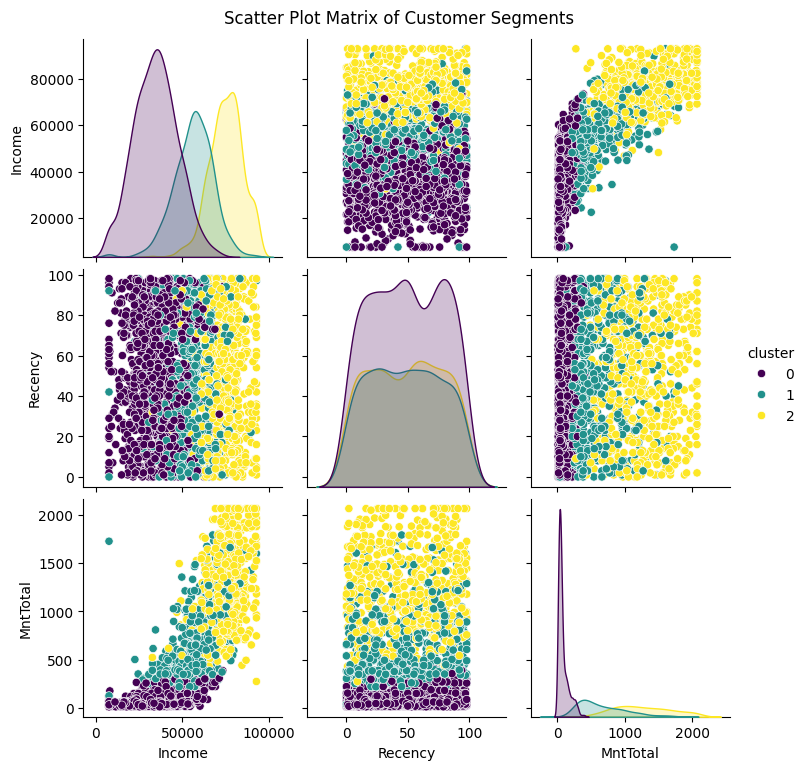

<ipython-input-36-543c82469d17>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='cluster', y=feature, data=df, palette='magma', ci='sd') # ci='sd' for standard deviation error bars
<ipython-input-36-543c82469d17>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y=feature, data=df, palette='magma', ci='sd') # ci='sd' for standard deviation error bars
<ipython-input-36-543c82469d17>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='cluster', y=feature, data=df, palette='magma', ci='sd') # ci='sd' for standard deviation error bars
<ipython-input-36-543c82469d17>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue

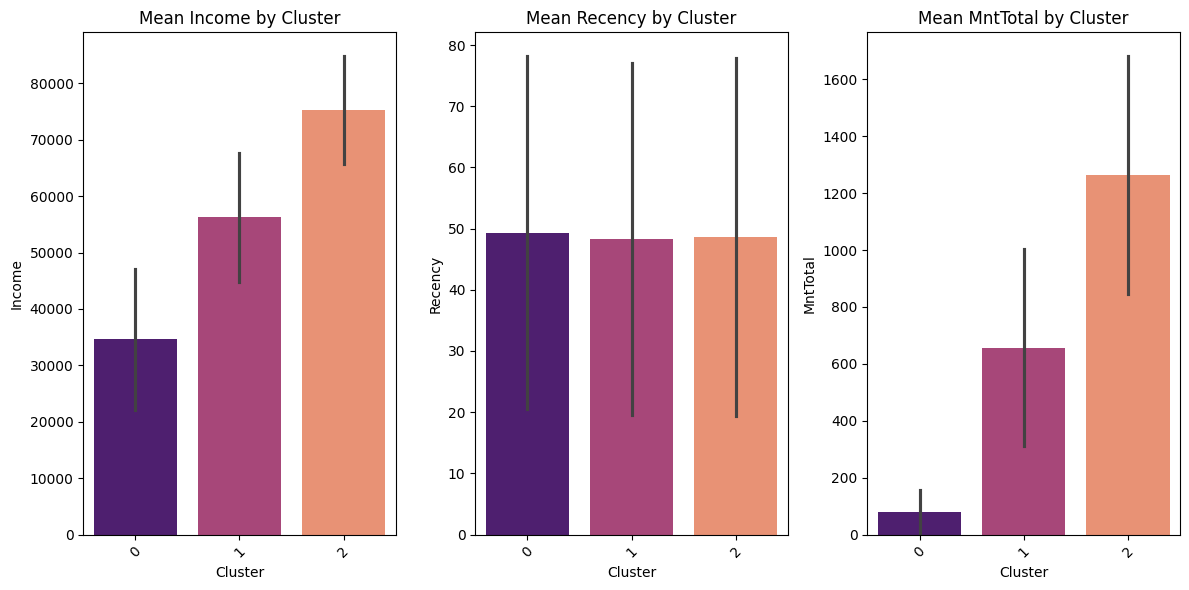

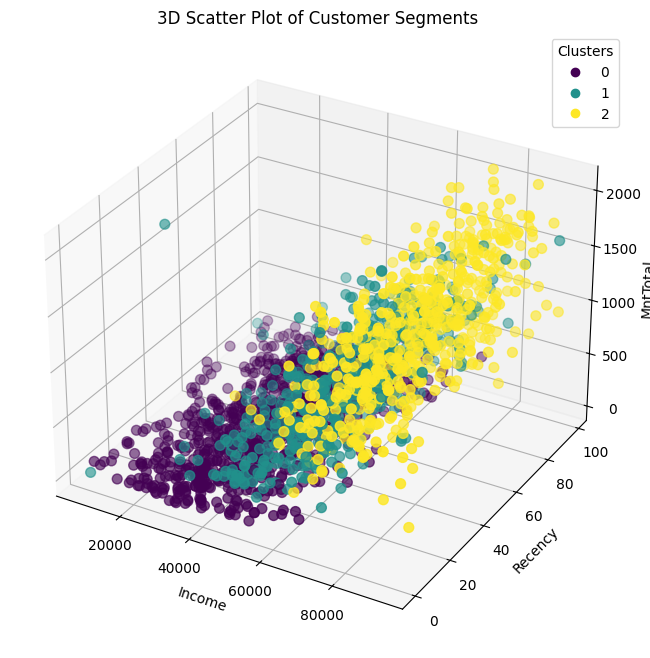

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Scatter plot matrix
sns.pairplot(df, vars=['Income', 'Recency', 'MntTotal'], hue='cluster', palette='viridis')
plt.suptitle('Scatter Plot Matrix of Customer Segments', y=1.02)
plt.show()


# Bar chart comparing mean values of key features across segments
plt.figure(figsize=(12, 6))
features = ['Income', 'Recency', 'MntTotal']
for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x='cluster', y=feature, data=df, palette='magma', ci='sd') # ci='sd' for standard deviation error bars
    plt.title(f'Mean {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Income'], df['Recency'], df['MntTotal'], c=df['cluster'], cmap='viridis', s=50)
ax.set_xlabel('Income')
ax.set_ylabel('Recency')
ax.set_zlabel('MntTotal')
ax.set_title('3D Scatter Plot of Customer Segments')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()